In [1]:
import sys
import os
current = os.path.dirname(os.path.realpath('./'))
sys.path.append(current)
from utils.ld_tools import *

### I. Images in introduction section

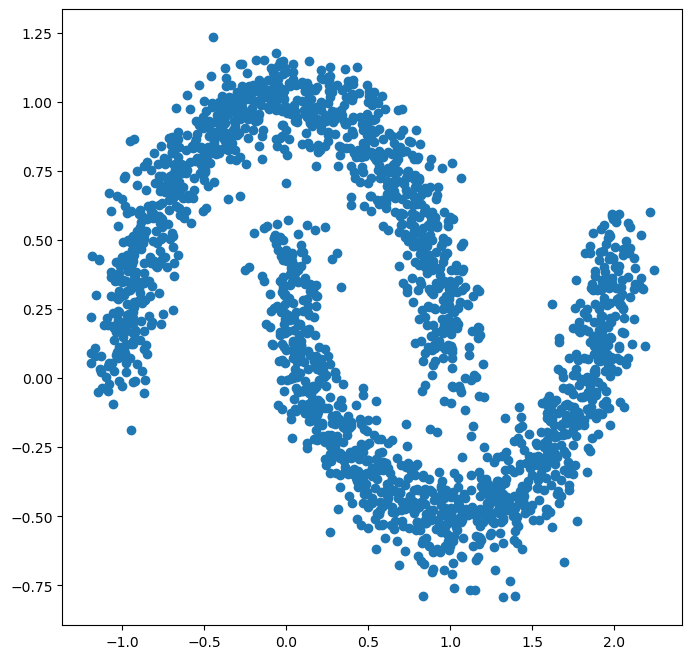

(900, 2)


In [2]:
from sklearn import datasets
points, y = datasets.make_moons(n_samples=2000,noise=0.1)
plt.rcParams['figure.figsize'] = [8,8]
plt.scatter(points[:,0],points[:,1])
#plt.grid()
plt.show()

import numpy as np
# define the lower and upper limits for x and y
minX1, maxX1, minX2, maxX2 = np.min(points[:,0])-0.5, np.max(points[:,0])+0.5, np.min(points[:,1])-0.5, np.max(points[:,1])+0.5
# create one-dimensional arrays for x and y
x1 = np.linspace(minX1, maxX1, 30)
x2 = np.linspace(minX2, maxX2, 30)
# create the mesh based on these arrays
X1, X2 = np.meshgrid(x1, x2)
X1 = X1.reshape(-1,)
X2 = X2.reshape(-1,)
points_ext = np.zeros((len(X1),2))
points_ext[:,0] = X1
points_ext[:,1] = X2
print(points_ext.shape)

In [3]:
points0 = points[np.where(y==0)]
points1 = points[np.where(y==1)]

In [4]:
list_moon = [points0, points1]
list_lens_depth_ext_fermat = []
for j in range(2):
    dist_mat = distance_matrix(list_moon[j],list_moon[j])
    fermat_dist_mat = fermat_function(dist_mat,alpha=3)
    lens_depth_ext_fermat = []
    for i in range(points_ext.shape[0]):
        dist_array = distance_matrix(list_moon[j],points_ext[i].reshape((1,-1)))
        dist_ext = fermat_function_ext(fermat_dist_mat, dist_array)
        lens_depth_ext_fermat += [lens_depth_ext_function(fermat_dist_mat, dist_ext)]
    list_lens_depth_ext_fermat += [np.array(lens_depth_ext_fermat)]
list_lens_depth_ext_fermat = np.array(list_lens_depth_ext_fermat)
lens_depth_ext_fermat_seperate = np.max(list_lens_depth_ext_fermat, axis=0)

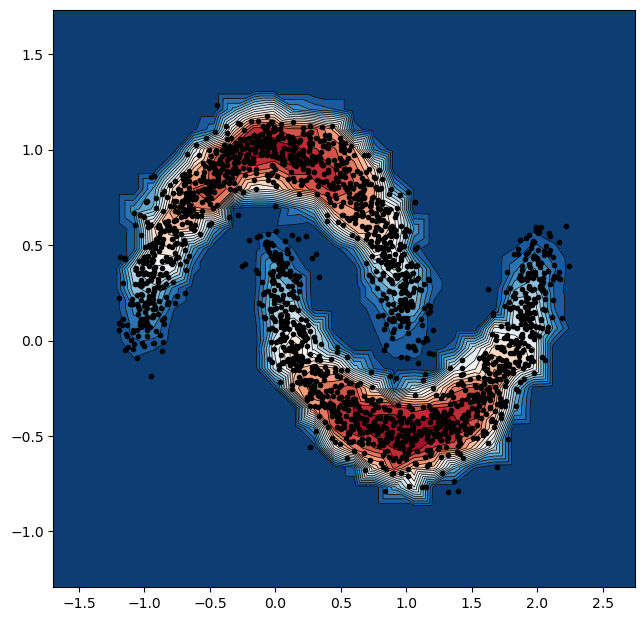

In [5]:
plt.rcParams["figure.figsize"] = (7.5,7.5)
fig, ax = plt.subplots()
ax.tricontour(points_ext[:,0], points_ext[:,1], lens_depth_ext_fermat_seperate, levels=20, linewidths=0.5, colors='k')
cntr = ax.tricontourf(points_ext[:,0], points_ext[:,1], lens_depth_ext_fermat_seperate, levels=20, cmap="RdBu_r")
#fig.colorbar(cntr, ax=ax)
#ax.plot(X_grid[:,0], X_grid[:,1], 'ko', ms=1, color="white")
ax.plot(points[:,0], points[:,1], 'ko', ms=3)
ax.set(xlim=(np.min(points[:,0])-0.5, np.max(points[:,0])+0.5), ylim=(np.min(points[:,1])-0.5, np.max(points[:,1])+0.5))
plt.show()

### II. Images in background section

#### II.1. Lens Depth using Euclidean distance

In [6]:
#### Gaussian
mean = [5,10]
cov = np.array([[5,2],[2,10]])
points = np.random.multivariate_normal(mean, cov, 1000)

In [7]:
import numpy as np
# define the lower and upper limits for x and y
minX1, maxX1, minX2, maxX2 = np.min(points[:,0])-1, np.max(points[:,0])+1, np.min(points[:,1])-1, np.max(points[:,1])+1
#minX1, maxX1, minX2, maxX2 = np.min(points[:,0])-0.5, np.max(points[:,0])+0.5, np.min(points[:,1])-0.5, np.max(points[:,1])+0.5
# create one-dimensional arrays for x and y
x1 = np.linspace(minX1, maxX1, 30)
x2 = np.linspace(minX2, maxX2, 30)
# create the mesh based on these arrays
X1, X2 = np.meshgrid(x1, x2)
X1 = X1.reshape(-1,)
X2 = X2.reshape(-1,)
X_grid = np.zeros((len(X1),2))
X_grid[:,0] = X1
X_grid[:,1] = X2

In [8]:
dist_mat = distance_matrix(points,points)
lens_depth_ext = []
for i in range(X_grid.shape[0]):
    dist_ext = distance_matrix(points,X_grid[i].reshape(-1,2))
    lens_depth_ext += [lens_depth_ext_function(dist_mat, dist_ext)]

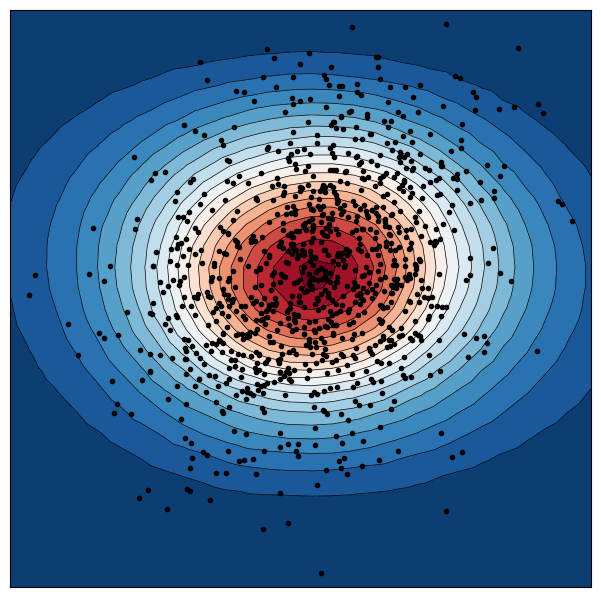

In [9]:
plt.rcParams["figure.figsize"] = (7.5,7.5)
fig, ax = plt.subplots()
ax.tricontour(X_grid[:,0], X_grid[:,1], lens_depth_ext, levels=20, linewidths=0.5, colors='k')
cntr = ax.tricontourf(X_grid[:,0], X_grid[:,1], lens_depth_ext, levels=20, cmap="RdBu_r")  #"RdBu_r"
#fig.colorbar(cntr, ax=ax)
#ax.plot(X_grid[:,0], X_grid[:,1], 'ko', ms=1, color="white")
ax.plot(points[:,0], points[:,1], 'ko', ms=3)
#ax.set(xlim=(np.min(points[:,0])-1, np.max(points[:,0])+1), ylim=(np.min(points[:,1])-1, np.max(points[:,1])+1))
ax.set(xlim=(np.min(points[:,0])-0.5, np.max(points[:,0])+0.5), ylim=(np.min(points[:,1])-0.5, np.max(points[:,1])+0.5))
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)
plt.show()

In [10]:
## Moon
from sklearn import datasets
points, y = datasets.make_moons(n_samples=2000,noise=0.1)
points = points[np.where(y==0)]
import numpy as np
# define the lower and upper limits for x and y
#minX1, maxX1, minX2, maxX2 = np.min(points[:,0])-1, np.max(points[:,0])+1, np.min(points[:,1])-1, np.max(points[:,1])+1
minX1, maxX1, minX2, maxX2 = np.min(points[:,0])-0.5, np.max(points[:,0])+0.5, np.min(points[:,1])-0.5, np.max(points[:,1])+0.5
# create one-dimensional arrays for x and y
x1 = np.linspace(minX1, maxX1, 30)
x2 = np.linspace(minX2, maxX2, 30)
# create the mesh based on these arrays
X1, X2 = np.meshgrid(x1, x2)
X1 = X1.reshape(-1,)
X2 = X2.reshape(-1,)
X_grid = np.zeros((len(X1),2))
X_grid[:,0] = X1
X_grid[:,1] = X2

In [11]:
dist_mat = distance_matrix(points,points)
lens_depth_ext = []
for i in range(X_grid.shape[0]):
    dist_ext = distance_matrix(points,X_grid[i].reshape(-1,2))
    lens_depth_ext += [lens_depth_ext_function(dist_mat, dist_ext)]

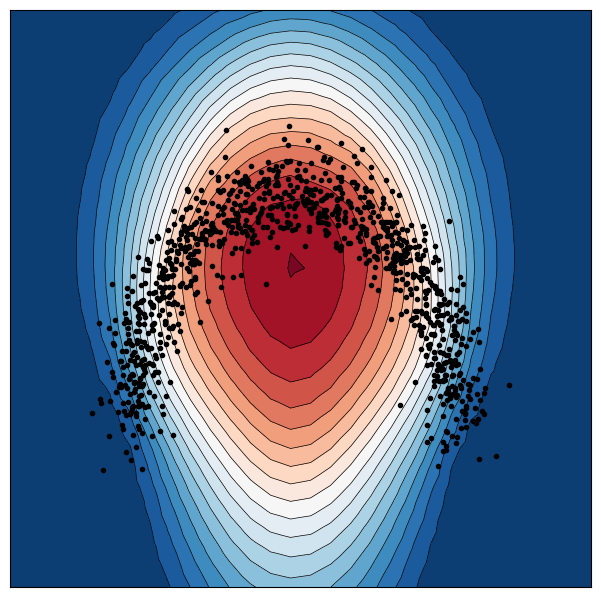

In [12]:
plt.rcParams["figure.figsize"] = (7.5,7.5)
fig, ax = plt.subplots()
ax.tricontour(X_grid[:,0], X_grid[:,1], lens_depth_ext, levels=20, linewidths=0.5, colors='k')
cntr = ax.tricontourf(X_grid[:,0], X_grid[:,1], lens_depth_ext, levels=20, cmap="RdBu_r")  #"RdBu_r"
#fig.colorbar(cntr, ax=ax)
#ax.plot(X_grid[:,0], X_grid[:,1], 'ko', ms=1, color="white")
ax.plot(points[:,0], points[:,1], 'ko', ms=3)
#ax.set(xlim=(np.min(points[:,0])-1, np.max(points[:,0])+1), ylim=(np.min(points[:,1])-1, np.max(points[:,1])+1))
ax.set(xlim=(np.min(points[:,0])-0.5, np.max(points[:,0])+0.5), ylim=(np.min(points[:,1])-0.5, np.max(points[:,1])+0.5))
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)
plt.show()

#### II.2. Fermat path

In [13]:
def reconstruct_path(pred,idx1,idx2):
    idx = idx2
    path = [idx2]
    while idx != idx1:
        path += [pred[idx1,idx]]
        idx = pred[idx1,idx]
    path += [idx1]
    return path

In [14]:
from sklearn import datasets
points, y = datasets.make_moons(n_samples=2000,noise=0.1,random_state=1)
points = points[np.where(y==0)]

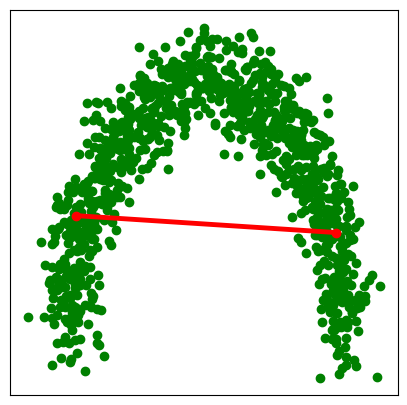

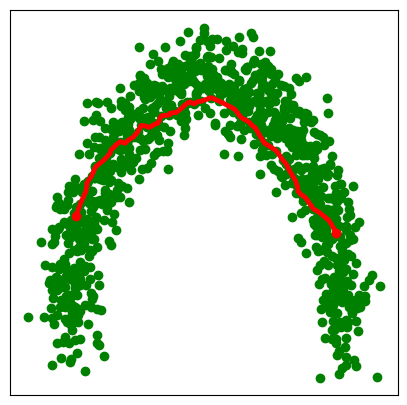

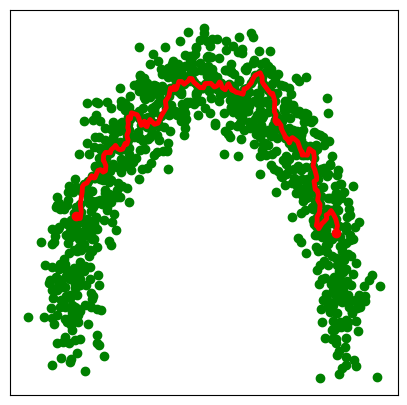

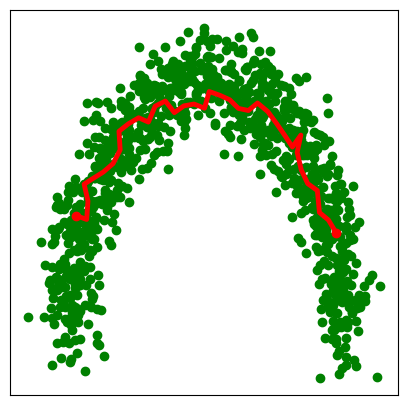

In [15]:
for alpha in [1,1.2,3,7]:
    dist_mat = distance_matrix(points,points)
    distances, pred = shortest_path(
                csgraph=np.matrix(np.power(dist_mat, alpha)),
                method='FW',
                directed=False,
                return_predecessors=True
            )
    #print(distances.shape)
    #print(pred)
    arg = np.argsort(points[:,0])
    idx1 = arg[int(0.1*points.shape[0])]
    idx2 = arg[int(0.9*points.shape[0])]
    path = reconstruct_path(pred,idx1,idx2)
    plt.rcParams['figure.figsize'] = [5,5]
    plt.scatter(points[:,0],points[:,1],color='green')
    plt.scatter(points[[idx1,idx2],0],points[[idx1,idx2],1],color='red')
    #plt.grid()
    plt.plot(points[path,0],points[path,1],color='red',linewidth=3.5)
    plt.gca().axes.get_yaxis().set_visible(False)
    plt.gca().axes.get_xaxis().set_visible(False)
    plt.show()

### III. Images in Fermat Lens Depth section

#### III.1. Fermat Lens Depth before modification

In [16]:
from sklearn import datasets
points, y = datasets.make_moons(n_samples=2000,noise=0.1,random_state=1)
points = points[np.where(y==0)]
minX1, maxX1, minX2, maxX2 = np.min(points[:,0])-0.5, np.max(points[:,0])+0.5, np.min(points[:,1])-0.5, np.max(points[:,1])+0.5
# create one-dimensional arrays for x and y
x1 = np.linspace(minX1, maxX1, 30)
x2 = np.linspace(minX2, maxX2, 30)
# create the mesh based on these arrays
X1, X2 = np.meshgrid(x1, x2)
X1 = X1.reshape(-1,)
X2 = X2.reshape(-1,)
X_grid = np.zeros((len(X1),2))
X_grid[:,0] = X1
X_grid[:,1] = X2
dist_mat = distance_matrix(points,points)
fermat_dist_mat = fermat_function(dist_mat, alpha=3)
fermat_lens_depth = lens_depth_function(fermat_dist_mat)
lens_depth_ext_fermat = []
for i in range(X_grid.shape[0]):
    index_min = np.argmin(distance_matrix(points,X_grid[i].reshape(-1,2)).reshape(-1,)) ## Find point in concerned dataset closest to the external point
    dist_ext = fermat_dist_mat[index_min,:]
    lens_depth_ext_fermat += [lens_depth_ext_function(fermat_dist_mat, dist_ext)]

/tmp/ipykernel_3040345/463285345.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  ax.plot(points[:,0], points[:,1],'ko', ms=3,color='black')


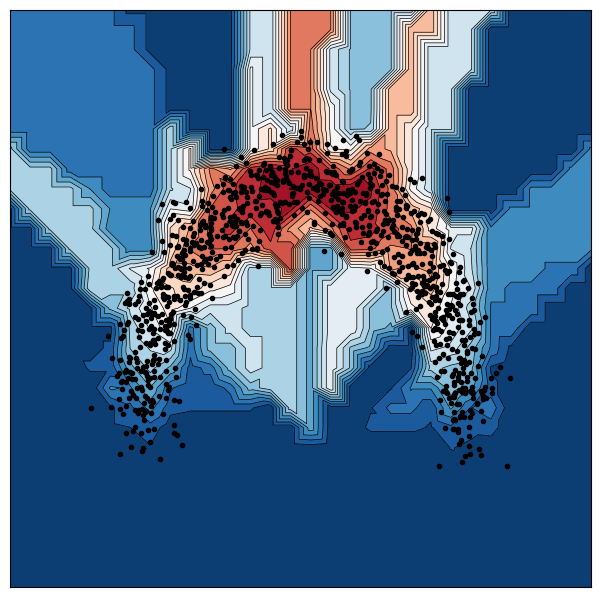

In [17]:
plt.rcParams["figure.figsize"] = (7.5,7.5)
fig, ax = plt.subplots()
ax.tricontour(X_grid[:,0], X_grid[:,1], lens_depth_ext_fermat, levels=20, linewidths=0.5, colors='k')
cntr = ax.tricontourf(X_grid[:,0], X_grid[:,1], lens_depth_ext_fermat, levels=20, cmap="RdBu_r")
#fig.colorbar(cntr, ax=ax)
# axes[0].plot(X_grid[:,0], X_grid[:,1], 'ko', ms=1, color="yellow")
ax.plot(points[:,0], points[:,1],'ko', ms=3,color='black')
ax.set(xlim=(np.min(points[:,0])-0.5, np.max(points[:,0])+0.5), ylim=(np.min(points[:,1])-0.5, np.max(points[:,1])+0.5))
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)
plt.show()

#### III.2. Fermat Lens Depth after modification

In [18]:
### Moon
from sklearn import datasets
points, y = datasets.make_moons(n_samples=2000,noise=0.1,random_state=1)
points = points[np.where(y==0)]
minX1, maxX1, minX2, maxX2 = np.min(points[:,0])-0.5, np.max(points[:,0])+0.5, np.min(points[:,1])-0.5, np.max(points[:,1])+0.5
# create one-dimensional arrays for x and y
x1 = np.linspace(minX1, maxX1, 30)
x2 = np.linspace(minX2, maxX2, 30)
# create the mesh based on these arrays
X1, X2 = np.meshgrid(x1, x2)
X1 = X1.reshape(-1,)
X2 = X2.reshape(-1,)
points_ext = np.zeros((len(X1),2))
points_ext[:,0] = X1
points_ext[:,1] = X2

In [19]:
alpha = 5
dist_mat = distance_matrix(points,points)
fermat_dist_mat = fermat_function(dist_mat,alpha=alpha)
lens_depth_ext_fermat = []
for i in range(points_ext.shape[0]):
    dist_array = distance_matrix(points,points_ext[i].reshape((1,-1)))
    dist_ext = fermat_function_ext(fermat_dist_mat, dist_array,alpha)
    lens_depth_ext_fermat += [lens_depth_ext_function(fermat_dist_mat, dist_ext)]

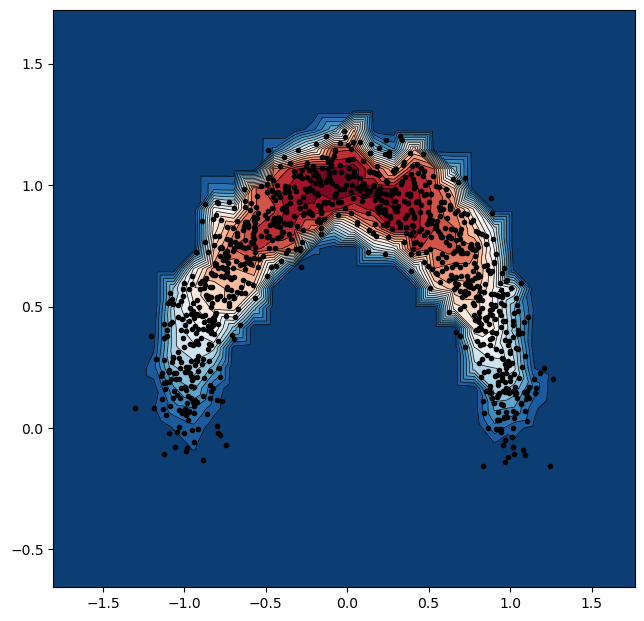

In [20]:
plt.rcParams["figure.figsize"] = (7.5,7.5)
fig, ax = plt.subplots()
ax.tricontour(points_ext[:,0], points_ext[:,1], lens_depth_ext_fermat, levels=20, linewidths=0.5, colors='k')
cntr = ax.tricontourf(points_ext[:,0], points_ext[:,1], lens_depth_ext_fermat, levels=20, cmap="RdBu_r")
#fig.colorbar(cntr, ax=ax)
#ax.plot(X_grid[:,0], X_grid[:,1], 'ko', ms=1, color="white")
ax.plot(points[:,0], points[:,1], 'ko', ms=3)
ax.set(xlim=(np.min(points[:,0])-0.5, np.max(points[:,0])+0.5), ylim=(np.min(points[:,1])-0.5, np.max(points[:,1])+0.5))
plt.show()

In [21]:
## spiral
N = 1000
theta = np.sqrt(np.random.rand(N))*3*math.pi
r_a = 2*theta + math.pi
data_a = np.array([np.cos(theta)*r_a, np.sin(theta)*r_a]).T
points = data_a + np.random.randn(N,2)
minX1, maxX1, minX2, maxX2 = np.min(points[:,0])-5, np.max(points[:,0])+5, np.min(points[:,1])-5, np.max(points[:,1])+5
# create one-dimensional arrays for x and y
x1 = np.linspace(minX1, maxX1, 30)
x2 = np.linspace(minX2, maxX2, 30)
# create the mesh based on these arrays
X1, X2 = np.meshgrid(x1, x2)
X1 = X1.reshape(-1,)
X2 = X2.reshape(-1,)
points_ext = np.zeros((len(X1),2))
points_ext[:,0] = X1
points_ext[:,1] = X2

In [22]:
alpha = 5
dist_mat = distance_matrix(points,points)
fermat_dist_mat = fermat_function(dist_mat,alpha=alpha)
lens_depth_ext_fermat = []
for i in range(points_ext.shape[0]):
    dist_array = distance_matrix(points,points_ext[i].reshape((1,-1)))
    dist_ext = fermat_function_ext(fermat_dist_mat, dist_array,alpha)
    lens_depth_ext_fermat += [lens_depth_ext_function(fermat_dist_mat, dist_ext)]

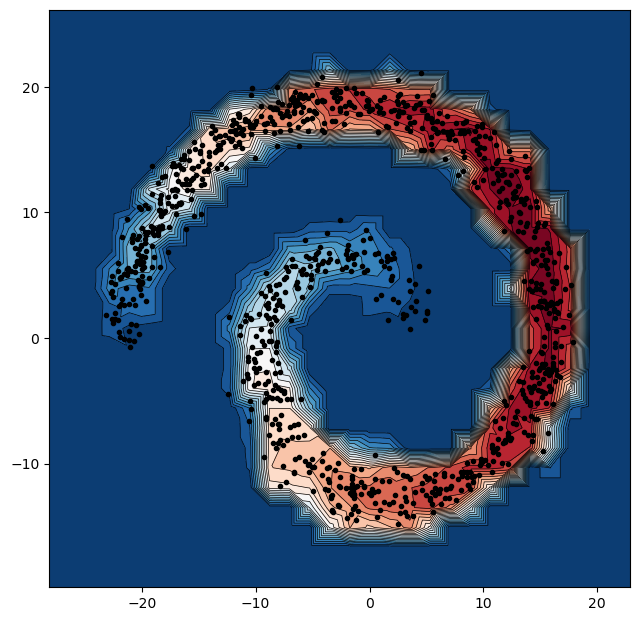

In [23]:
plt.rcParams["figure.figsize"] = (7.5,7.5)
fig, ax = plt.subplots()
ax.tricontour(points_ext[:,0], points_ext[:,1], lens_depth_ext_fermat, levels=20, linewidths=0.5, colors='k')
cntr = ax.tricontourf(points_ext[:,0], points_ext[:,1], lens_depth_ext_fermat, levels=20, cmap="RdBu_r")
#fig.colorbar(cntr, ax=ax)
#ax.plot(X_grid[:,0], X_grid[:,1], 'ko', ms=1, color="white")
ax.plot(points[:,0], points[:,1], 'ko', ms=3)
ax.set(xlim=(np.min(points[:,0])-5, np.max(points[:,0])+5), ylim=(np.min(points[:,1])-5, np.max(points[:,1])+5))
plt.show()

#### III.3. LD using only 20% points

In [24]:
N = 1000
theta = np.sqrt(np.random.rand(N))*3*math.pi
r_a = 2*theta + math.pi
data_a = np.array([np.cos(theta)*r_a, np.sin(theta)*r_a]).T
points = data_a + np.random.randn(N,2)
import numpy as np
# define the lower and upper limits for x and y
minX1, maxX1, minX2, maxX2 = np.min(points[:,0])-5, np.max(points[:,0])+5, np.min(points[:,1])-5, np.max(points[:,1])+5
# create one-dimensional arrays for x and y
x1 = np.linspace(minX1, maxX1, 30)
x2 = np.linspace(minX2, maxX2, 30)
# create the mesh based on these arrays
X1, X2 = np.meshgrid(x1, x2)
X1 = X1.reshape(-1,)
X2 = X2.reshape(-1,)
points_ext = np.zeros((len(X1),2))
points_ext[:,0] = X1
points_ext[:,1] = X2

In [27]:
alpha = 5
inner_points =  np.array(random.sample(list(points),k=200))
dist_mat_reduced = distance_matrix(inner_points,inner_points)
fermat_dist_mat_reduced = fermat_function(dist_mat_reduced,alpha=alpha)
lens_depth_ext_fermat_reduced = []
for i in range(points_ext.shape[0]):
    dist_array = distance_matrix(inner_points,points_ext[i].reshape((1,-1)))
    dist_ext = fermat_function_ext(fermat_dist_mat_reduced, dist_array,alpha)
    lens_depth_ext_fermat_reduced += [lens_depth_ext_function(fermat_dist_mat_reduced, dist_ext)]

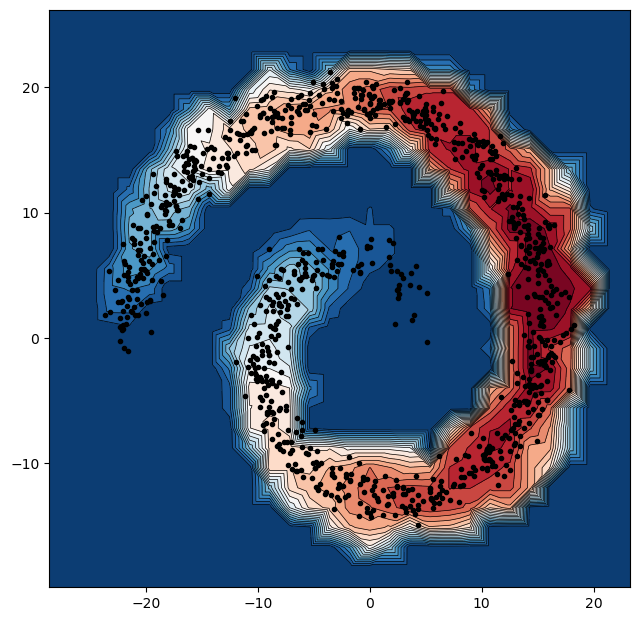

In [28]:
plt.rcParams["figure.figsize"] = (7.5,7.5)
fig, ax = plt.subplots()
ax.tricontour(points_ext[:,0], points_ext[:,1], lens_depth_ext_fermat_reduced, levels=20, linewidths=0.5, colors='k')
cntr = ax.tricontourf(points_ext[:,0], points_ext[:,1], lens_depth_ext_fermat_reduced, levels=20, cmap="RdBu_r")
#fig.colorbar(cntr, ax=ax)
#ax.plot(X_grid[:,0], X_grid[:,1], 'ko', ms=1, color="white")
ax.plot(points[:,0], points[:,1], 'ko', ms=3)
ax.set(xlim=(np.min(points[:,0])-5, np.max(points[:,0])+5), ylim=(np.min(points[:,1])-5, np.max(points[:,1])+5))
plt.show()

#### Apply percent until failing

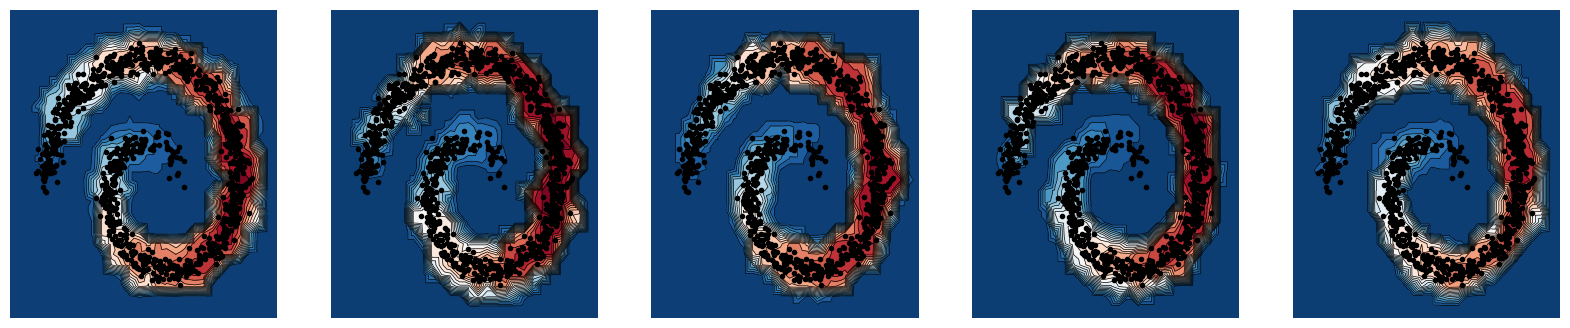

In [29]:
alpha = 5
plt.rcParams["figure.figsize"] = (20,4)
fig, ax = plt.subplots(1,5)
for random_number in range(5):
    inner_points =  np.array(random.sample(list(points),k=200))
    dist_mat_reduced = distance_matrix(inner_points,inner_points)
    fermat_dist_mat_reduced = fermat_function(dist_mat_reduced,alpha=alpha)
    lens_depth_ext_fermat_reduced = []
    for i in range(points_ext.shape[0]):
        dist_array = distance_matrix(inner_points,points_ext[i].reshape((1,-1)))
        dist_ext = fermat_function_ext(fermat_dist_mat_reduced, dist_array,alpha)
        lens_depth_ext_fermat_reduced += [lens_depth_ext_function(fermat_dist_mat_reduced, dist_ext)]
    
    ax[random_number].tricontour(points_ext[:,0], points_ext[:,1], lens_depth_ext_fermat_reduced, levels=20, linewidths=0.5, colors='k')
    cntr = ax[random_number].tricontourf(points_ext[:,0], points_ext[:,1], lens_depth_ext_fermat_reduced, levels=20, cmap="RdBu_r")
    #fig.colorbar(cntr, ax=ax)
    #ax.plot(X_grid[:,0], X_grid[:,1], 'ko', ms=1, color="white")
    ax[random_number].plot(points[:,0], points[:,1], 'ko', ms=3)
    ax[random_number].set(xlim=(np.min(points[:,0])-5, np.max(points[:,0])+5), ylim=(np.min(points[:,1])-5, np.max(points[:,1])+5))
    ax[random_number].axis('off')
plt.show()

#### III.4. LD using different values of $\alpha$

In [30]:
## spiral
N = 1000
theta = np.sqrt(np.random.rand(N))*3*math.pi
r_a = 2*theta + math.pi
data_a = np.array([np.cos(theta)*r_a, np.sin(theta)*r_a]).T
points = data_a + np.random.randn(N,2)
minX1, maxX1, minX2, maxX2 = np.min(points[:,0])-5, np.max(points[:,0])+5, np.min(points[:,1])-5, np.max(points[:,1])+5
# create one-dimensional arrays for x and y
x1 = np.linspace(minX1, maxX1, 30)
x2 = np.linspace(minX2, maxX2, 30)
# create the mesh based on these arrays
X1, X2 = np.meshgrid(x1, x2)
X1 = X1.reshape(-1,)
X2 = X2.reshape(-1,)
points_ext = np.zeros((len(X1),2))
points_ext[:,0] = X1
points_ext[:,1] = X2

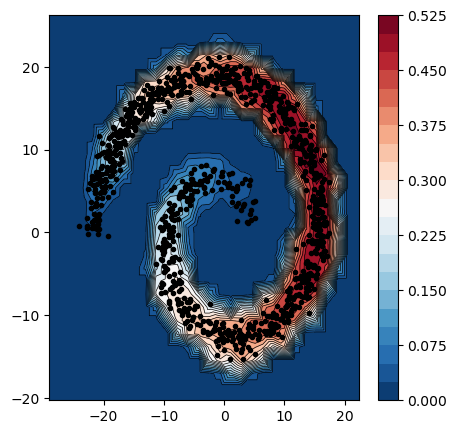

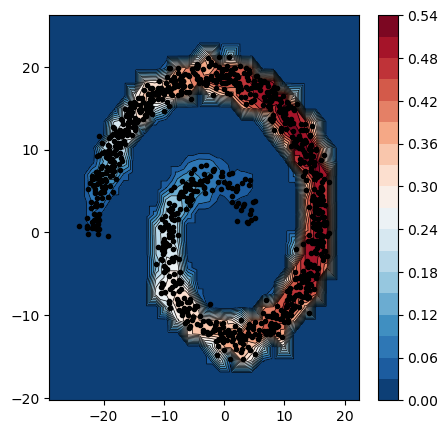

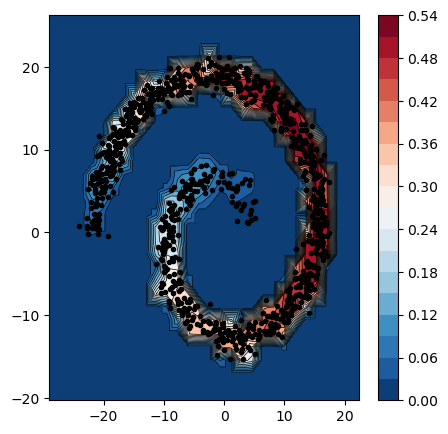

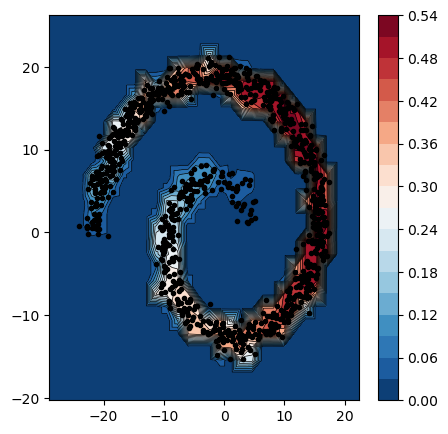

In [31]:
for alpha in [3,5,10,15]:
    dist_mat = distance_matrix(points,points)
    fermat_dist_mat = fermat_function(dist_mat,alpha=alpha)
    lens_depth_ext_fermat = []
    for i in range(points_ext.shape[0]):
        dist_array = distance_matrix(points,points_ext[i].reshape((1,-1)))
        dist_ext = fermat_function_ext(fermat_dist_mat, dist_array,alpha)
        lens_depth_ext_fermat += [lens_depth_ext_function(fermat_dist_mat, dist_ext)]
    plt.rcParams["figure.figsize"] = (5,5)
    fig, ax = plt.subplots()
    ax.tricontour(points_ext[:,0], points_ext[:,1], lens_depth_ext_fermat, levels=20, linewidths=0.5, colors='k')
    cntr = ax.tricontourf(points_ext[:,0], points_ext[:,1], lens_depth_ext_fermat, levels=20, cmap="RdBu_r")
    fig.colorbar(cntr, ax=ax)
    #ax.plot(X_grid[:,0], X_grid[:,1], 'ko', ms=1, color="white")
    ax.plot(points[:,0], points[:,1], 'ko', ms=3)
    ax.set(xlim=(np.min(points[:,0])-5, np.max(points[:,0])+5), ylim=(np.min(points[:,1])-5, np.max(points[:,1])+5))
    plt.show()

#### III.4. One cluster or multiple clusters

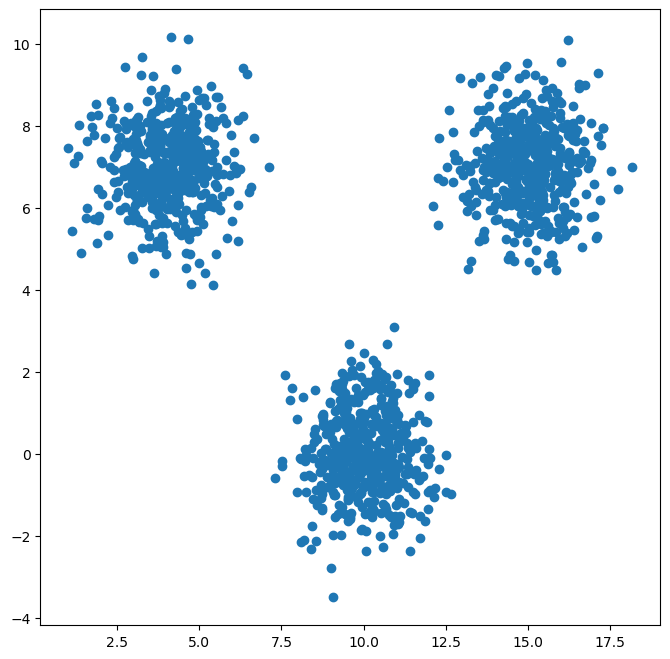

In [32]:
from random import gauss
mean1 = [4,7]
cov1 = np.array([[1,0],[0,1]])
mean2 = [15,7]
cov2 = np.array([[1,0],[0,1]])
mean3 = [10,0]
cov3 = np.array([[1,0],[0,1]])
gauss1 = np.random.multivariate_normal(mean1, cov1, 500)
gauss2 = np.random.multivariate_normal(mean2, cov2, 500)
gauss3 = np.random.multivariate_normal(mean3, cov3, 500)
points = np.concatenate((gauss1,gauss2,gauss3))#,gauss4,gauss5))
plt.rcParams['figure.figsize'] = [8,8]
plt.scatter(points[:,0],points[:,1])
plt.show()
# define the lower and upper limits for x and y
minX1, maxX1, minX2, maxX2 = np.min(points[:,0])-1, np.max(points[:,0])+1, np.min(points[:,1])-1, np.max(points[:,1])+1
#minX1, maxX1, minX2, maxX2 = np.min(points[:,0])-2, np.max(points[:,0])+2, np.min(points[:,1])-2, np.max(points[:,1])+2
# create one-dimensional arrays for x and y
x1 = np.linspace(minX1, maxX1, 30)
x2 = np.linspace(minX2, maxX2, 30)
# create the mesh based on these arrays
X1, X2 = np.meshgrid(x1, x2)
X1 = X1.reshape(-1,)
X2 = X2.reshape(-1,)
points_ext = np.zeros((len(X1),2))
points_ext[:,0] = X1
points_ext[:,1] = X2

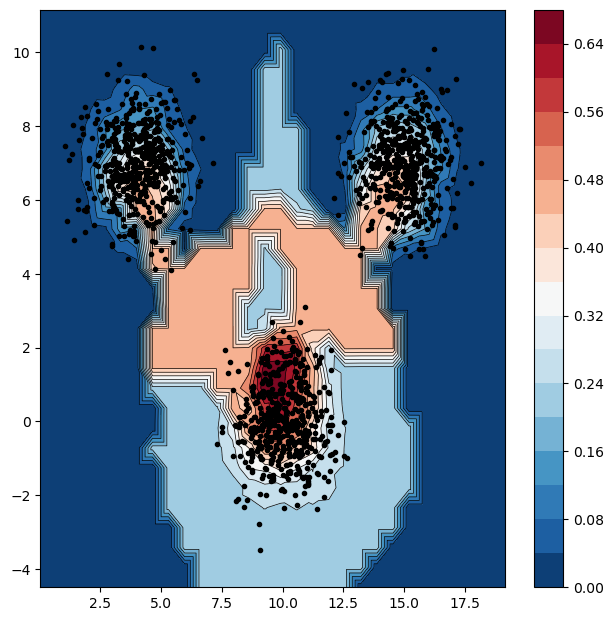

In [33]:
### One cluster
import numpy as np
alpha = 3
dist_mat = distance_matrix(points,points)
fermat_dist_mat = fermat_function(dist_mat,alpha=alpha)
lens_depth_ext_fermat = []
for i in range(points_ext.shape[0]):
    dist_array = distance_matrix(points,points_ext[i].reshape((1,-1)))
    dist_ext = fermat_function_ext(fermat_dist_mat, dist_array,alpha)
    lens_depth_ext_fermat += [lens_depth_ext_function(fermat_dist_mat, dist_ext)]
plt.rcParams["figure.figsize"] = (7.5,7.5)
fig, ax = plt.subplots()
ax.tricontour(points_ext[:,0], points_ext[:,1], lens_depth_ext_fermat, levels=20, linewidths=0.5, colors='k')
cntr = ax.tricontourf(points_ext[:,0], points_ext[:,1], lens_depth_ext_fermat, levels=20, cmap="RdBu_r")
fig.colorbar(cntr, ax=ax)
#ax.plot(X_grid[:,0], X_grid[:,1], 'ko', ms=1, color="white")
ax.plot(points[:,0], points[:,1], 'ko', ms=3)
ax.set(xlim=(np.min(points[:,0])-1, np.max(points[:,0])+1), ylim=(np.min(points[:,1])-1, np.max(points[:,1])+1))
plt.show()

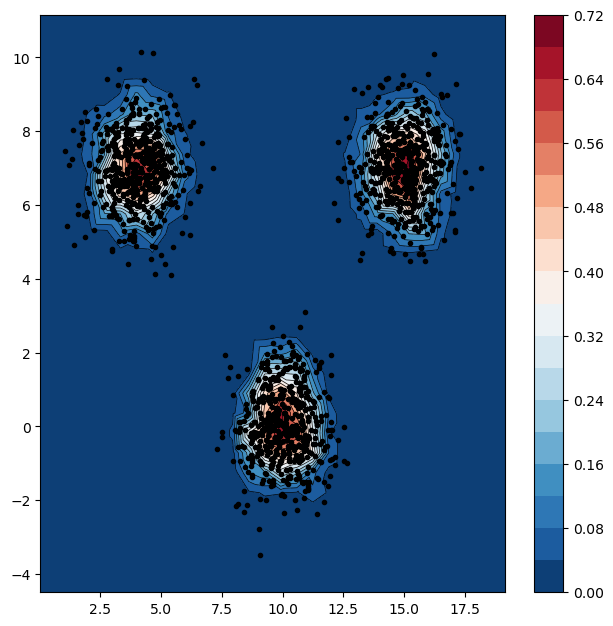

In [34]:
### Multiple clusters
list_gauss = [gauss1,gauss2,gauss3]
list_lens_depth_ext_fermat = []
for j in range(3):
    dist_mat = distance_matrix(list_gauss[j],list_gauss[j])
    fermat_dist_mat = fermat_function(dist_mat,alpha=3)
    lens_depth_ext_fermat = []
    for i in range(points_ext.shape[0]):
        dist_array = distance_matrix(list_gauss[j],points_ext[i].reshape((1,-1)))
        dist_ext = fermat_function_ext(fermat_dist_mat, dist_array)
        lens_depth_ext_fermat += [lens_depth_ext_function(fermat_dist_mat, dist_ext)]
    list_lens_depth_ext_fermat += [np.array(lens_depth_ext_fermat)]
list_lens_depth_ext_fermat = np.array(list_lens_depth_ext_fermat)
lens_depth_ext_fermat_seperate = np.max(list_lens_depth_ext_fermat, axis=0)
plt.rcParams["figure.figsize"] = (7.5,7.5)
fig, ax = plt.subplots()
ax.tricontour(points_ext[:,0], points_ext[:,1], lens_depth_ext_fermat_seperate, levels=20, linewidths=0.5, colors='k')
cntr = ax.tricontourf(points_ext[:,0], points_ext[:,1], lens_depth_ext_fermat_seperate, levels=20, cmap="RdBu_r")
fig.colorbar(cntr, ax=ax)
#ax.plot(X_grid[:,0], X_grid[:,1], 'ko', ms=1, color="white")
ax.plot(points[:,0], points[:,1], 'ko', ms=3)
ax.set(xlim=(np.min(points[:,0])-1, np.max(points[:,0])+1), ylim=(np.min(points[:,1])-1, np.max(points[:,1])+1))
plt.show()